In [1]:
def calculate_global_AR(file, column='amplitudes'):
    '''This function takes CardIAP whole cell analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(file)-1):
        transient1 = float(file[column][i])
        transient2 = float(file[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

def calculate_local_AR(file, column='amplitudes'):
    '''This function takes CardIAP slices analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(slice_df)-1):
        transient1 = float(slice_df[column][i])
        transient2 = float(slice_df[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

In [2]:
def calculate_alternance_ratio(transients):
    '''Alternance Ratio (AR) was calculated as the difference in the magnitude of the two consecutive local transients / the amplitude of the largest transient.
'transients' parameter corresponds to 'calculate_AR' output.
The output is a list of AR'''
    AR_list = []
    for transient_tuple in transients:
        AR = (abs(transient_tuple[0]-transient_tuple[1]))/max(transient_tuple[0], transient_tuple[1])
        AR_list.append(AR)
    return AR_list

In [3]:
def discordance_index(local_AR_df):
    '''The discordance index (DI) is defined as the standard deviation of the measured local AR values.
    Input is 'calculate_alternance_ratio' of local AR output
    Output is a list od DI'''
    return local_AR_df.std().to_list()

In [4]:
# Corre el AR global y devuelve una lista con los valores por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/complete_cell.csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients_amplitudes = calculate_global_AR(file)
calculate_alternance_ratio(transients_amplitudes)

[0.06043952354924411,
 0.035714282749258815,
 0.025000039434857808,
 0.03571425226269879,
 0.024390220211343055]

In [5]:
# Corre el AR local y devuelve un df con los valores por slice por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices (1).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
local_AR = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    AR = calculate_alternance_ratio(transients_amplitudes)
    local_AR.append(AR)
local_AR_df = pd.DataFrame(local_AR)

In [6]:
# Corre el DI y devuelve una lista con los valores por pico

discordance_index(local_AR_df)

[0.29278613996057745,
 0.27862350201083613,
 0.2734271458332998,
 0.2737429579567253,
 0.2460676558634115,
 0.24800429494730086,
 0.26926470637299155,
 0.26283601753502367,
 0.27891237376061584]

In [7]:
from matplotlib.backends.backend_qt5agg import FigureCanvas

def scaling_image(fig):
    canvas = FigureCanvas(fig)
    canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    width, height = fig.get_size_inches() * fig.get_dpi()
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    return img

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def display_multiple_img(images, rows = 4, cols=4):
    fig = plt.figure(figsize=(18, 12))
    plt.subplots_adjust(wspace= 0.01, hspace= 0.01)
    for ind,title in enumerate(images):
        sub = fig.add_subplot(rows,cols,ind+1) # two rows, two columns, fist cell
        sub.imshow(images[ind])
        sub.set_title('Transient'+str(ind+1))
        sub.set_axis_off()
    plt.tight_layout()
    plt.show()

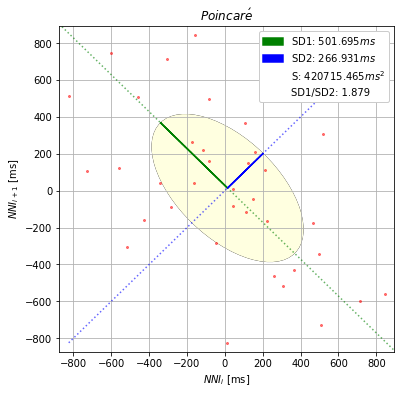

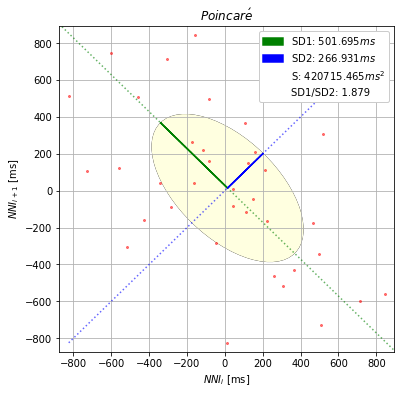

In [22]:
nl.poincare(rpeaks=local_ar_list,show=False)[0]

In [ ]:
import pyhrv.nonlinear as nl

imgs=[]
for i in range(len(local_AR_df.columns)):
    # Estructuración de datos para Poincaré
    local_ar_list = [local_AR_df[i].dropna().tolist()]
    local_ar_list = [item for sublist in local_ar_list for item in sublist]
    # Compute Poincaré using NNI series
    fig = nl.poincare(rpeaks=local_ar_list, show=False)['poincare_plot']
    img = scaling_image(fig)
    imgs.append(img)

display_multiple_img(imgs)

In [ ]:
# Esto grafica la distribución de las amplitudes de las slices de cada pico

import matplotlib.pyplot as plt
import numpy as np

data = np.array(local_AR_df.dropna())
fig7, ax7 = plt.subplots()
ax7.set_title('Transient localAR distributions')
ax7.boxplot(data)

plt.show()

In [ ]:
# Corre el AR local y devuelve un df con los valores por slice por pico

import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices (1).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    transients.append(transients_amplitudes)

### Comparación de métricas que salen de CardIAP

In [102]:
import pandas as pd
import os

file_path = '/media/leandro/Volumen1TB1/Lean/Analizador_imagenes_calcio/CardIAP/ejemplo/'
list_files = [x for x in os.listdir(file_path) if 'DI_table' in x]
metrica_df = pd.DataFrame()
for file in list_files:
    df =  pd.read_csv(file_path + file, sep='\t', index_col=0)
    metrica_df = pd.concat([metrica_df,df], axis=1)
    metrica_df = metrica_df.rename(columns={'DI': 'DI_'+file[9:-4], 'Global AR': 'Global AR_'+file[9:-4]})
print(metrica_df.mean())

DI_altdisc           4.094709
Global AR_altdisc    0.480036
DI_dan               1.667450
Global AR_dan        0.641077
DI_alt               1.713638
Global AR_alt        3.101708
DI_C                 1.276711
Global AR_C          0.477554
dtype: float64


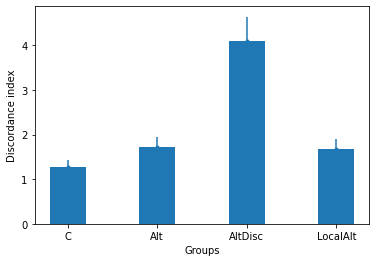

In [103]:
import numpy as np 
import matplotlib.pyplot as plt 
  

Ygirls = [metrica_df['DI_C'].mean(),metrica_df['DI_alt'].mean(),metrica_df['DI_altdisc'].mean(),metrica_df['DI_dan'].mean()]

  
X_axis = ['C','Alt','AltDisc','LocalAlt']
Y_std = [metrica_df['DI_C'].std(),metrica_df['DI_alt'].std(),metrica_df['DI_altdisc'].std(),metrica_df['DI_dan'].std()]
plt.bar(X_axis, Ygirls, 0.4)
plt.errorbar(x =X_axis, y=Ygirls, yerr = Y_std, fmt=".")
  
plt.xticks(X_axis)
plt.xlabel("Groups")
plt.ylabel("Discordance index")
plt.show()

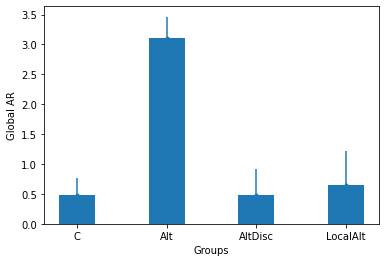

In [104]:
Ygirls = [metrica_df['Global AR_C'].mean(),metrica_df['Global AR_alt'].mean(),metrica_df['Global AR_altdisc'].mean(),metrica_df['Global AR_dan'].mean()]

  
X_axis = ['C','Alt','AltDisc','LocalAlt']
Y_std = [metrica_df['Global AR_C'].std(),metrica_df['Global AR_alt'].std(),metrica_df['Global AR_altdisc'].std(),metrica_df['Global AR_dan'].std()]
plt.bar(X_axis, Ygirls, 0.4)
plt.errorbar(x =X_axis, y=Ygirls, yerr = Y_std, fmt=".")
  
plt.xticks(X_axis)
plt.xlabel("Groups")
plt.ylabel("Global AR")
plt.show()

### Comparación de métricas locales que salen de CardIAP

In [93]:
import pandas as pd
import os

file_path = '/media/leandro/Volumen1TB1/Lean/Analizador_imagenes_calcio/CardIAP/ejemplo/'
list_files = [x for x in os.listdir(file_path) if 'Local_AR_Results' in x]
localar_df = pd.DataFrame()
for file in list_files:
    df =  pd.read_csv(file_path + file, sep='\t', index_col=0).mean(axis=1)[:33]
    localar_df = pd.concat([localar_df,df], axis=1)
    localar_df = localar_df.rename(columns={0: file[23:-4]})
print(localar_df)

         dan         C    altdisc       alt
0   3.379746  1.981311   8.033770  3.654018
1   3.015925  2.160051  10.924168  3.918577
2   3.650469  2.541150  11.271262  2.648751
3   3.115032  1.440751   8.950473  3.898349
4   2.142293  2.109434   5.971434  3.500202
5   3.644490  1.138055   3.119976  2.761537
6   2.867964  2.070181  10.496436  3.374348
7   2.888101  1.458244  12.928571  1.932676
8   3.784690  1.857329  11.918607  3.209465
9   1.643822  1.629157  11.004830  4.788104
10  2.000497  1.167248   9.855972  2.732133
11  1.291123  2.255983   4.811477  2.208398
12  2.639850  1.056515   2.675281  2.833279
13  1.400001  1.384398   6.489142  2.824774
14  2.509043  1.846593   8.490453  2.578578
15  1.814091  1.998740   8.640958  4.404741
16  2.489795  2.189527   5.974128  3.344326
17  1.907296  2.621001   6.593660  1.648525
18  1.625327  1.661736   4.171187  3.380153
19  2.237179  2.312191   1.985165  3.721935
20  2.319376  2.061191   1.615053  4.388753
21  2.920143  1.465931   2.48702

<AxesSubplot:>

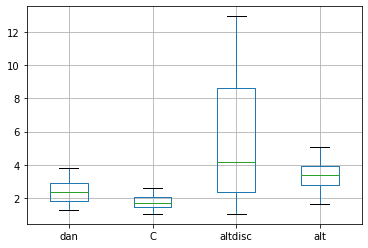

In [96]:
localar_df.boxplot()

In [101]:
import scipy.stats

scipy.stats.kstest(localar_df['alt'],localar_df['C'])

KstestResult(statistic=0.8181818181818182, pvalue=2.5170626409119765e-11)